# LO3: Design Principles vs. Data

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

In [38]:
df_pl = pd.read_csv("EPL_20_21.csv")
df_pl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0


In [3]:
# With this command we can see if there are any NAN values
df_pl.isna().any()

Name                     False
Club                     False
Nationality              False
Position                 False
Age                      False
Matches                  False
Starts                   False
Mins                     False
Goals                    False
Assists                  False
Passes_Attempted         False
Perc_Passes_Completed    False
Penalty_Goals            False
Penalty_Attempted        False
xG                       False
xA                       False
Yellow_Cards             False
Red_Cards                False
dtype: bool

In [4]:
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

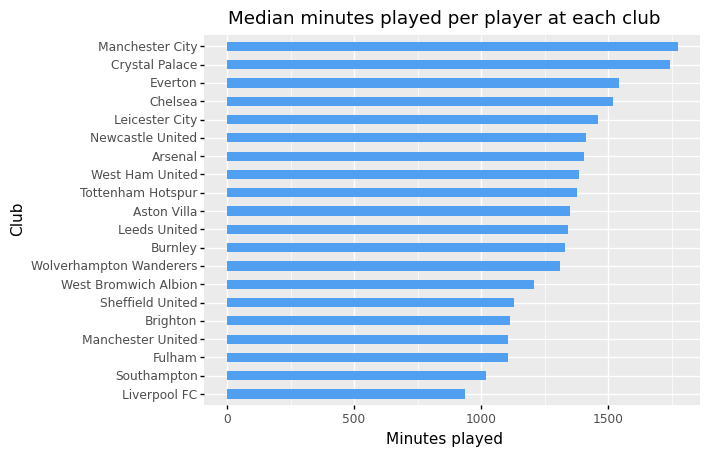

<ggplot: (116034640216)>

In [5]:
# Median of minutes for each club
df_mins_per_club = df_pl.groupby('Club')[['Club', 'Mins']].median()

df_mins_per_club_sorted = df_mins_per_club.sort_values('Mins', ascending=True).reset_index()

# Bar chart
(ggplot(df_mins_per_club_sorted, aes(x=df_mins_per_club_sorted.Club, y=df_mins_per_club_sorted.Mins))
 + geom_col(fill="#509FF0", width=.5)
 + coord_flip()
 + scale_x_discrete(limits=df_mins_per_club_sorted.Club)
 + labs(y='Minutes played', x='Club', title='Median minutes played per player at each club')
)

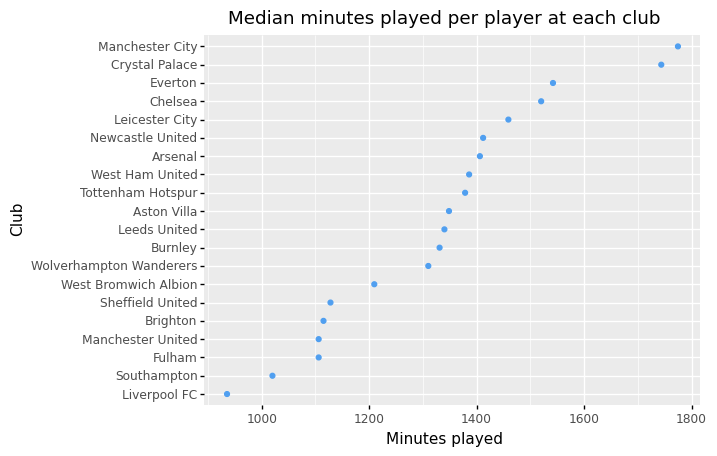

<ggplot: (116034849600)>

In [6]:
# Scatter Plot
(ggplot(df_mins_per_club_sorted, aes(x=df_mins_per_club_sorted.Club, y=df_mins_per_club_sorted.Mins))
 + geom_point(color="#509FF0")
 + coord_flip()
 + scale_x_discrete(limits=df_mins_per_club_sorted.Club)
 + labs(y='Minutes played', x='Club', title='Median minutes played per player at each club')
)

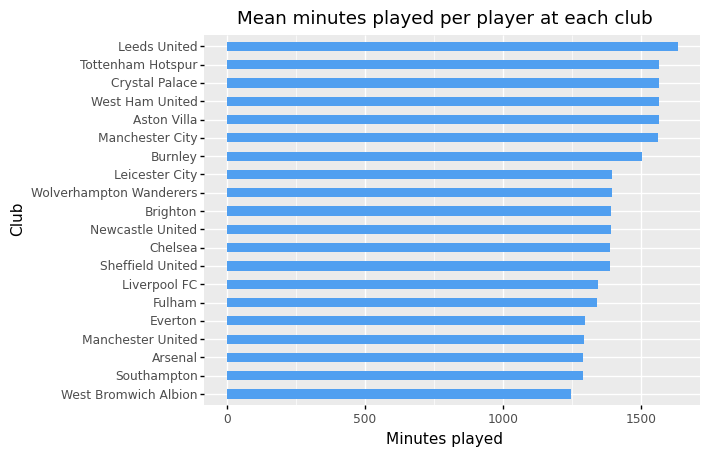

<ggplot: (116034773866)>

In [7]:
# Mean of minutes for each club
df_mins_per_club = df_pl.groupby('Club')[['Club', 'Mins']].mean()

df_mins_per_club_sorted = df_mins_per_club.sort_values('Mins', ascending=True).reset_index()

# Bar chart
(ggplot(df_mins_per_club_sorted, aes(x=df_mins_per_club_sorted.Club, y=df_mins_per_club_sorted.Mins))
 + geom_col(fill="#509FF0", width=.5)
 + coord_flip()
 + scale_x_discrete(limits=df_mins_per_club_sorted.Club)
 + labs(y='Minutes played', x='Club', title='Mean minutes played per player at each club')
)

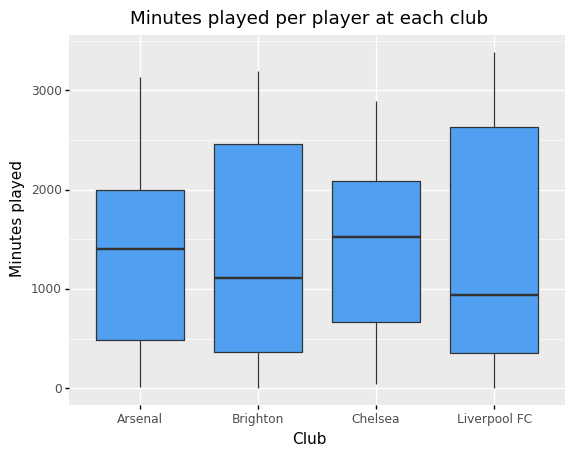

<ggplot: (116034861279)>

In [8]:
# Boxplot with average minutes per team

teams = ['Arsenal', 'Chelsea', 'Liverpool FC', 'Brighton']
df_team = df_pl[df_pl['Club'].isin(teams)]

(ggplot(df_team, aes(x=df_team.Club, y=df_team.Mins))
 + geom_boxplot(fill="#509FF0")
 + labs(y='Minutes played', x='Club', title='Minutes played per player at each club')
)

### Table

In [9]:
# select first 9 columns
df_important = df_pl.iloc[:, :9]
df_liv_important = df_important[df_important.Club == "Liverpool FC"]
df_liv_important = df_liv_important.sort_values('Goals', ascending=False)
df_liv_important.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals
81,Mohamed Salah,Liverpool FC,EGY,FW,28,37,34,3078,22
86,Sadio Mané,Liverpool FC,SEN,FW,28,35,31,2810,11
85,Roberto Firmino,Liverpool FC,BRA,FW,28,36,33,2838,9
92,Diogo Jota,Liverpool FC,POR,FW,23,19,12,1112,9
82,Trent Alexander-Arnold,Liverpool FC,ENG,DF,21,36,34,3031,2


### Scale

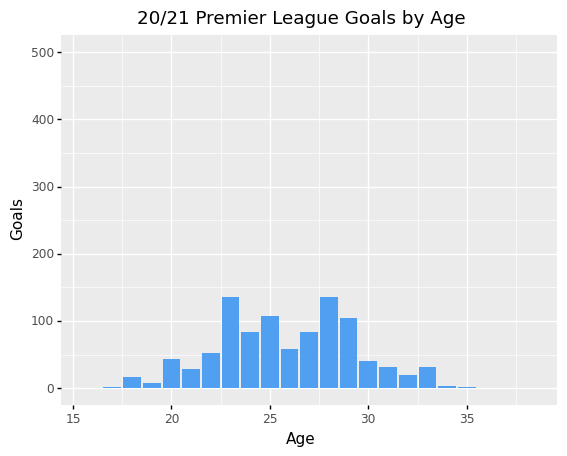

<ggplot: (116036122399)>

In [41]:
# Force y axis range to 500

(ggplot(df_pl, aes(x=df_pl.Age, y=df_pl.Goals))
 + geom_col(fill="#509FF0", width=0.9)
 + labs(y='Goals', x='Age', title='20/21 Premier League Goals by Age')
 + ylim(0, 500)
)

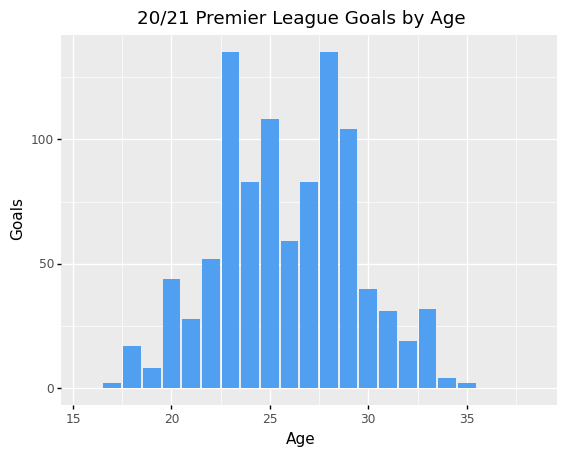

<ggplot: (116035838112)>

In [42]:
# Remove y axis range to see changes better (default)
(ggplot(df_pl, aes(x=df_pl.Age, y=df_pl.Goals))
 + geom_col(fill="#509FF0", width=0.9)
 + labs(y='Goals', x='Age', title='20/21 Premier League Goals by Age')
)